Importing Libraries

In [252]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import  GridSearchCV
from imblearn.over_sampling import SMOTE as sm
from sklearn.feature_selection import SelectFromModel
import imblearn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)


DATA 

In [218]:
data_log=pd.read_csv("synthetic.csv")

Data Analysis

In [219]:
data_log.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-13.028746,2.182041,-0.331036,-1.501078,-12.622918,-10.854249,15.199978,-1.989472,6.407913,-2.926042,...,-5.472288,10.543841,-6.003123,3.746927,18.425973,2.742845,3.475475,1.864313,-1.137531,0.145000
std,3.659720,1.314388,4.259927,1.922640,3.604514,9.750920,7.206344,6.454849,16.872978,0.673362,...,0.272104,8.311382,1.873970,4.962534,6.134947,7.049830,2.048401,10.351793,8.543692,0.352277
min,-25.548066,-1.599455,-14.930338,-10.215498,-24.600418,-55.753091,-4.320908,-22.643235,-51.040173,-4.907236,...,-6.378320,-14.553686,-12.804169,-10.970233,-1.014732,-18.778590,-2.594584,-30.715194,-27.231646,0.000000
25%,-15.588659,1.285855,-3.149624,-2.808884,-15.109200,-17.120274,10.231755,-6.188742,-4.853568,-3.383162,...,-5.666194,4.728117,-7.268277,0.279869,14.232877,-2.051034,2.102943,-4.779697,-6.883752,0.000000
50%,-13.072938,2.170483,-0.367062,-1.510223,-12.498793,-11.170167,15.196222,-2.026093,6.431541,-2.928571,...,-5.467538,10.698797,-5.919298,3.841361,18.301716,2.989103,3.488600,1.362105,-1.012529,0.000000
75%,-10.534016,3.021294,2.485166,-0.237209,-10.214818,-4.522221,19.901376,2.392737,18.145285,-2.487445,...,-5.287631,16.268073,-4.677299,7.306957,22.495502,7.393532,4.913292,8.998301,4.753629,0.000000
max,-2.382520,6.026316,14.980421,5.101086,2.182904,23.826332,36.646915,19.820630,55.897492,-0.712244,...,-4.671847,36.154495,-0.188857,20.068337,36.539176,25.577773,9.590002,31.900767,31.280122,1.000000


In [220]:
data_log.shape

(1000, 31)

In [221]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
x1     1000 non-null float64
x2     1000 non-null float64
x3     1000 non-null float64
x4     1000 non-null float64
x5     1000 non-null float64
x6     1000 non-null float64
x7     1000 non-null float64
x8     1000 non-null float64
x9     1000 non-null float64
x10    1000 non-null float64
x11    1000 non-null float64
x12    1000 non-null float64
x13    1000 non-null float64
x14    1000 non-null float64
x15    1000 non-null float64
x16    1000 non-null float64
x17    1000 non-null float64
x18    1000 non-null float64
x19    1000 non-null float64
x20    1000 non-null float64
x21    1000 non-null float64
x22    1000 non-null float64
x23    1000 non-null float64
x24    1000 non-null float64
x25    1000 non-null float64
x26    1000 non-null float64
x27    1000 non-null float64
x28    1000 non-null float64
x29    1000 non-null float64
x30    1000 non-null float64
y      1000 non-null int

In [222]:
print(data_log["y"].value_counts(dropna=False))


0    855
1    145
Name: y, dtype: int64


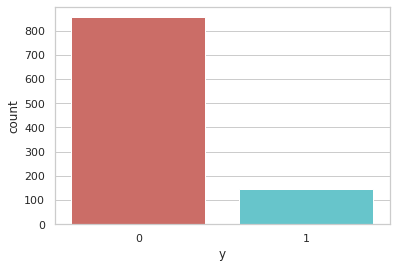

In [223]:
sns.countplot(x="y",data=data_log,palette="hls")

In [224]:
#check missing values

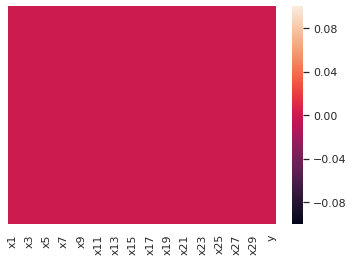

In [225]:
sns.heatmap(data_log.isnull(),yticklabels=False)

In [226]:
#check outliers

In [227]:
data_log.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'y'],
      dtype='object')

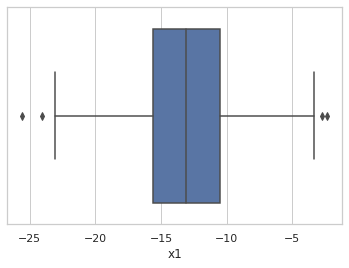

In [228]:
sns.boxplot(x=data_log['x1'])

In [229]:
##seems some variables have outliers

In [230]:
from scipy import stats
z = np.abs(stats.zscore(data_log))
print(z)

[[4.56570406e-01 1.42852045e-01 3.33576939e-01 ... 1.28617286e+00
  3.58842176e-01 2.42828164e+00]
 [1.24970839e+00 5.10842624e-04 3.06119767e-01 ... 9.87117048e-01
  5.31055476e-01 4.11813845e-01]
 [1.77348952e+00 6.98886603e-01 3.83844771e-02 ... 7.08620245e-01
  4.94901533e-01 4.11813845e-01]
 ...
 [1.44698409e+00 3.27024675e-01 9.84698350e-01 ... 1.78089160e+00
  5.17430217e-02 4.11813845e-01]
 [8.87366645e-01 1.08638904e-01 2.43159489e-01 ... 1.40417098e+00
  2.56274133e+00 4.11813845e-01]
 [5.54009156e-01 1.99419823e-01 1.30618295e-01 ... 7.04138993e-01
  2.98374432e-01 4.11813845e-01]]


In [231]:
##setting threshhold
threshold = 3
print(np.where(z > 3))

(array([ 18,  58,  79,  90, 104, 111, 133, 150, 167, 167, 180, 186, 187,
       192, 211, 223, 229, 262, 271, 323, 334, 343, 347, 348, 350, 351,
       366, 369, 375, 395, 398, 417, 418, 418, 429, 436, 439, 442, 442,
       444, 451, 466, 504, 515, 522, 529, 537, 537, 571, 592, 595, 640,
       642, 645, 651, 652, 687, 706, 769, 770, 775, 779, 781, 784, 798,
       798, 808, 809, 809, 828, 828, 841, 846, 851, 853, 865, 870, 886,
       900, 935, 991]), array([ 2, 14,  8, 20, 18, 13, 11, 10,  3, 29, 18, 15,  5,  5, 16, 22, 18,
        4, 21,  8, 11, 28, 23, 18, 20,  3, 15,  3, 13, 14,  0, 26,  0, 26,
        7, 15, 24,  2,  3,  5, 18, 24, 25, 21, 22, 20, 17, 29,  8, 11, 22,
       13,  7,  2, 14, 11, 10,  4, 14,  9, 19,  2, 16, 23,  3,  5, 15, 25,
       26, 15, 26, 18, 29,  7, 18, 20, 10,  4, 10,  2,  7]))


In [232]:
###fixing oultiers

In [233]:
data_log_o = data_log[(z < 3).all(axis=1)]

In [234]:
data_log_o.shape

(926, 31)

In [235]:
data_log_o.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,-14.698830,2.369710,1.089267,-1.262030,-15.650082,-16.665997,15.909853,-11.121045,18.275820,-2.405075,...,-5.421817,15.233291,-3.484405,2.755223,9.766386,6.419560,6.618973,15.171849,1.926773,1
1,-8.457451,2.182712,0.972360,-4.255289,-11.524392,-4.843399,9.557964,-10.145921,6.655710,-2.821156,...,-5.398857,20.342647,-5.395054,2.816668,14.932127,9.134028,4.826775,12.077634,3.397375,0
2,-6.541517,1.263892,-0.494469,-2.562072,-8.979410,-23.632245,15.740920,-4.460916,-16.528412,-3.901285,...,-5.339781,10.859401,-2.095555,2.945595,14.778588,2.711564,-0.090958,-5.467509,3.088641,0
3,-18.139840,1.569545,-3.286717,-4.255045,-16.146687,-25.893126,12.005963,-2.228017,5.853151,-2.951831,...,-5.652446,-8.674892,-9.665123,8.876766,22.335086,10.194627,2.720710,-1.787331,-0.291131,0
4,-12.500957,2.313632,5.227138,2.586718,-15.022213,-3.105726,18.070314,-7.745197,0.300133,-3.364458,...,-5.551594,13.195368,-5.089818,12.362742,22.624796,4.407471,3.022274,-1.705888,6.650217,0


Slicing Data


In [236]:

X= data_log_o.loc[:, data_log.columns != 'y']
y = data_log_o.loc[:, data_log.columns == 'y']



10-FOLD CROSS VALIDATION


In [237]:

kf = model_selection.KFold(n_splits = 10, shuffle=True, random_state=0)
kf.get_n_splits(data_log_o)
for train_index, test_index in kf.split(data_log_o):
    X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(648, 30) (648, 1)
(278, 30) (278, 1)


Running Rondom Forest directly 

In [212]:
# Instantiate rf
rf = RandomForestClassifier(n_estimators=20,
                           random_state=2)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)  

/home/algospark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [213]:
y_pred = rf.predict(X_test)


Baseline F1 score

In [246]:
f1_score(y_test, y_pred,average='macro')

0.45703125

# Checking the importance of features

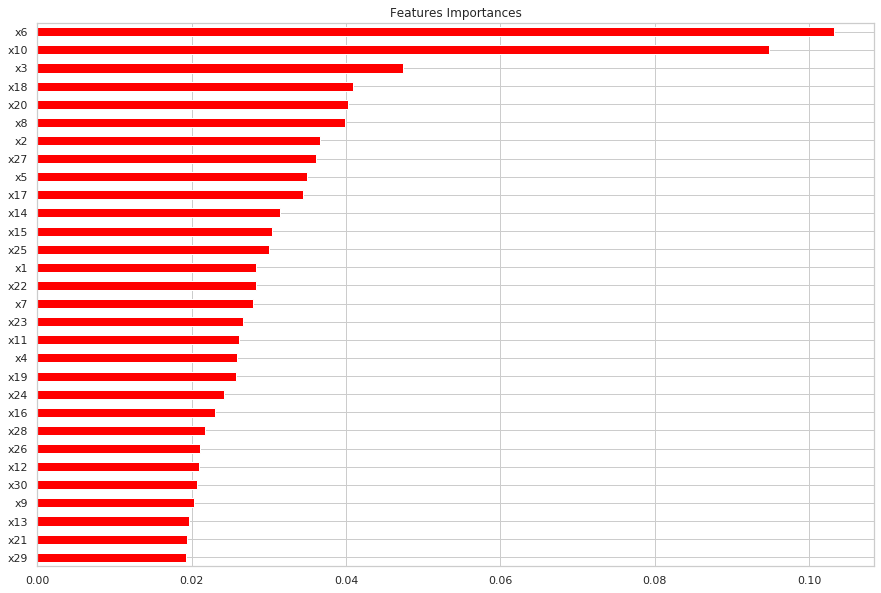

In [216]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='red',figsize=(15,10))
plt.title('Features Importances')
plt.show()

TUNING MODEL

Adding Hyperparameters Directly

In [159]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [160]:
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             'max_features':[25]
             }

In [161]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1,
                      refit=True)
                      



In [249]:
grid_rf.fit(X_train, y_train)
best_model = grid_rf.best_estimator_

y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   18.2s finished
/home/algospark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.25925925925925924

By Tunning hyperparameters the f1 score increased to 0.58

In [251]:
f1_score(y_test, y_pred, average='macro')


0.5897889921794304

# Improvig the performance by tuning grid parameters

In [266]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [268]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features = [25]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [25], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Folds were reduced due to time complexity

In [269]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
rf= RandomForestClassifier()
# Random search of parameters, using  fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 60, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.0min finished
/home/algospark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [270]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 25,
 'max_depth': 20,
 'bootstrap': True}

In [271]:
from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators':[1400],
     'min_samples_split': [2],
     'min_samples_leaf': [1],
     'max_features':[25],
     'max_depth': [20],
     'bootstrap': [False]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [272]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.0s finished
/home/algospark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [273]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [274]:
best_grid = grid_search.best_estimator_
y_pred=best_grid.predict(X_test)
grid_accuracy=f1_score(y_test,y_pred,average= 'macro')

print(grid_accuracy)

0.6313886210221794


In [ ]:
##Comparison REsult